In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Задания

In [3]:
import numpy as np
import pandas as pd

## Задание 1

Загрузи информацию о [заявках на кредит](datasets/credit_scoring.csv).
Перечисли имена клиентов, которым должны одобрить заявку на кредит, исходя из изображенного дерева решений.

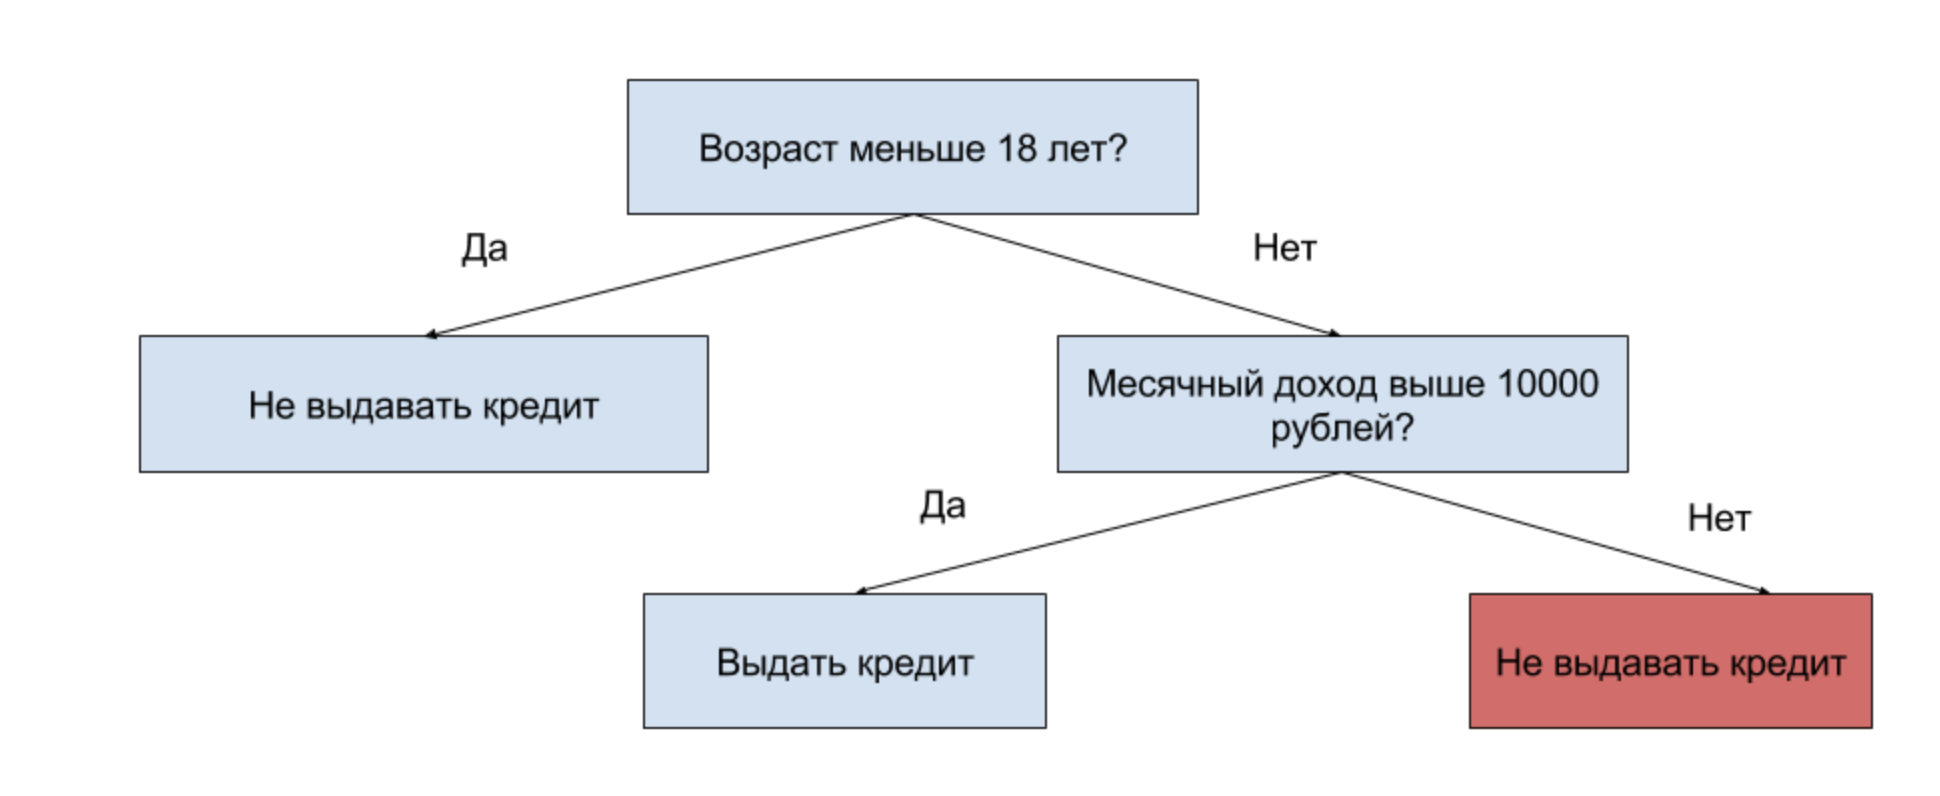

In [5]:
# загрузка данных о заявках на кредит
data = pd.read_csv('/content/drive/MyDrive/DS07-1-develop/datasets/credit_scoring.csv')
#data = pd.read_csv('../datasets/credit_scoring.csv')

# фильтрация данных по условиям: возраст > 18 и месячный доход > 10000
approved_clients = data[(data['Возраст'] > 18) & (data['Месячный доход'] > 10000)]['Имя']

# вывод имён клиентов
if len(approved_clients) > 0:
    print('Клиенты, которым должны одобрить заявку на кредит:')
    for client in approved_clients:
        print(' ', client)

Клиенты, которым должны одобрить заявку на кредит:
  Ольга
  Петр


## Задание 2

Давай решим задачу классификации.
Загрузи классический датасет [классификации ирисов](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset).
В нем содержатся измерения параметров чашелистиков и лепестков для различных подвидов ирисов.
Отрисуй диаграмму рассеяния (Scatterplot) в координатах "Длина чашелистика" / "Длина лепестка", цвет маркера должен
показывать вид ириса. Обязательно добавь легенду по маркерам.

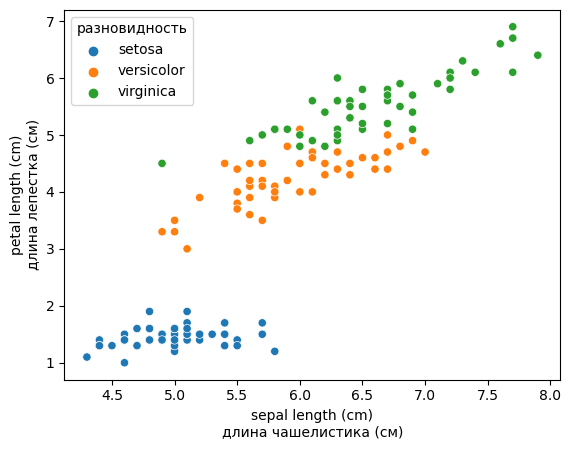

In [6]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

# загрузка датасета ирисов
iris = load_iris()

# создание DataFrame
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['разновидность'] = [iris.target_names[idx] for idx in iris.target]

# построение диаграммы рассеяния
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='petal length (cm)', hue='разновидность')
plt.xlabel('sepal length (cm)\nдлина чашелистика (см)')
plt.ylabel('petal length (cm)\nдлина лепестка (см)')
plt.show()

## Задание 3

Попробуй решить задачу классификации подвидов ирисов с помощью деревьев решений.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`

Используя только признаки "Длина чашелистика" и "Длина лепестка", обучи дерево решений с глубиной дерева 2.
Посчитай точность (accuracy) классификации и округли её до 3 знаков после запятой.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# загрузка датасета ирисов
iris = load_iris()

# извлечение признаков и меток, используя только признаки "Длина чашелистика" и "Длина лепестка"
X = df_iris[['sepal length (cm)', 'petal length (cm)']]
y = iris.target

# разделение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение дерева решений с максимальной глубиной 2
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# расчет точности классификации
accuracy = accuracy_score(y_test, y_pred)

print(f"Точность классификации: {accuracy:.3f}")

Точность классификации: 0.967


## Задание 4

Построй [разделяющую поверхность](code-samples/surface.py) по признакам "Длина чашелистика" и "Длина лепестка".
Также отрисуй дерево, которое получилось в результате обучения модели.
Напиши сколько листов у получившегося дерева.

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


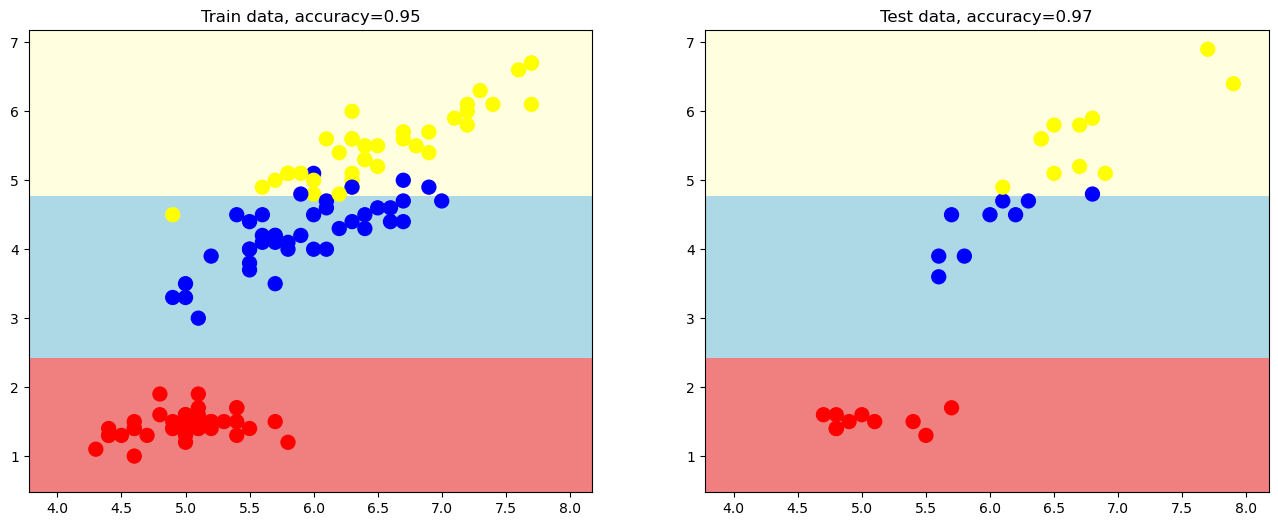

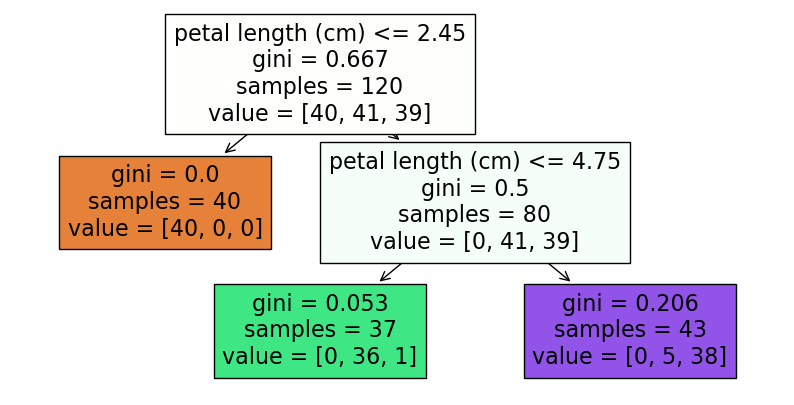

Точность классификации: 0.967
У получившегося дерева 3 листa


In [8]:
from sklearn.tree import plot_tree

import sys
sys.path.append('/content/drive/MyDrive/DS07-1-develop/code-samples')  # путь к каталогу code-samples
#sys.path.append('../code-samples')  # путь к каталогу code-samples
from surface import plot_decision_surface

# построение разделяющей поверхности и отображение дерева
plot_decision_surface(clf, X_train, y_train, X_test, y_test)
plt.figure(figsize=(10, 5))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()

print(f'У получившегося дерева {clf.tree_.n_leaves} листa')

## Задание 5

Теперь попробуем с помощью деревьев решений решить задачу регрессии.
Сгенерируй [синусоидальный сигнал](code-samples/dataset.py) с небольшими шумами размером 1000 отсчетов.
Раздели датасет на обучающую и тестовую с параметрами `test_size=0.2`, `random_state=42`.
Обучи дерево решений для предсказания синусоидального сигнала c глубиной дерева 1.
Построй график истинных ответов и предсказаний модели. Построив само дерево решений ты сможешь понять причины такого поведения модели.

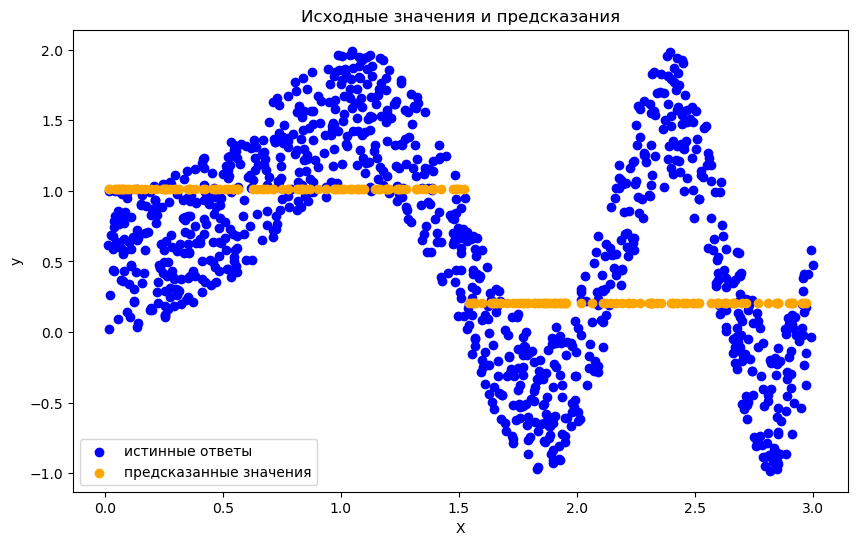

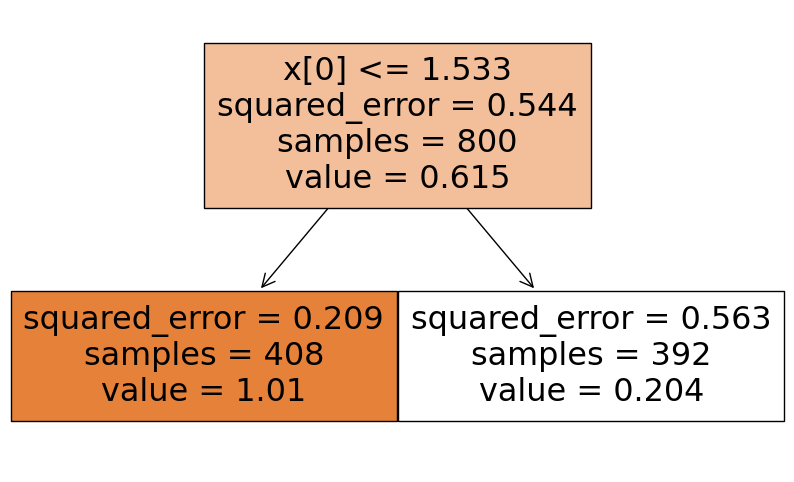

In [9]:
from sklearn.tree import DecisionTreeRegressor
import sys
sys.path.append('/content/drive/MyDrive/DS07-1-develop/code-samples')  # путь к каталогу code-samples
#sys.path.append('../code-samples')  # путь к каталогу code-samples
from dataset import generate_sin

# генерация синусоидального сигнала
X, y = generate_sin(1000)

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# обучение дерева решений
clf = DecisionTreeRegressor(max_depth=1)
clf.fit(X_train, y_train)

# предсказание на тестовой выборке
y_pred = clf.predict(X_test)

# визуализация исходных значений и предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='истинные ответы')
plt.scatter(X_test, y_pred, color='orange', label='предсказанные значения')
plt.title('Исходные значения и предсказания')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# отображение дерева решений
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True)
plt.show()

## Задание 6

Попробуй менять грубину дерева в дереве решений для предсказания синуса.
Построй график зависимости среднеквадратичной ошибки (MSE) предсказания на тестовой выборке от глубины дерева
(от 1 до 30). Напиши глубину дерева, при которой качество модели наилучшее.

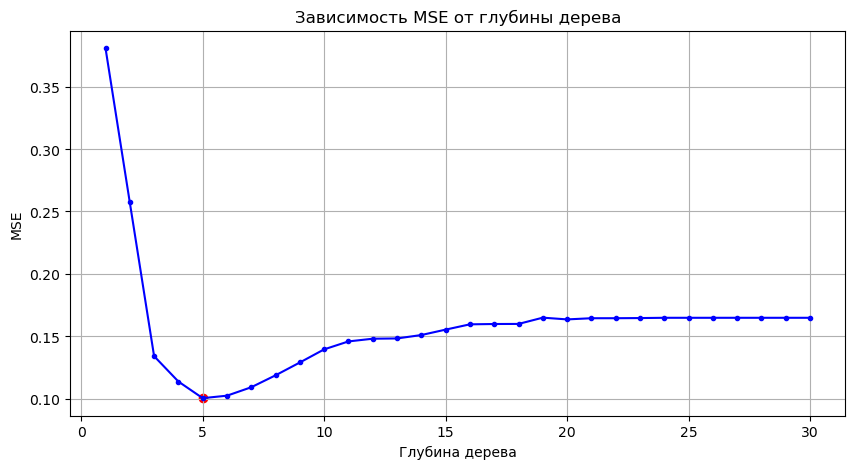

Глубина дерева, на которой MSE на тестовой выборке наилучший: 5


In [10]:
from sklearn.metrics import mean_squared_error

# генерация синусоидального сигнала
X, y = generate_sin(1000)

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# подготовка списка для сохранения значений MSE
mse_values = []

# перебор разных глубин дерева
depths = range(1, 31)
for depth in depths:
    # обучение дерева решений
    clf = DecisionTreeRegressor(max_depth=depth)
    clf.fit(X_train, y_train)

    # предсказание на тестовой выборке
    y_pred = clf.predict(X_test)

    # вычисление MSE и добавление в список
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# определение глубины дерева с наилучшим качеством (наименьшим MSE)
best_depth = depths[np.argmin(mse_values)]

# построение графика зависимости MSE от глубины дерева
plt.figure(figsize=(10, 5))
plt.plot(depths, mse_values, marker='.', color='b')
plt.title('Зависимость MSE от глубины дерева')
plt.xlabel('Глубина дерева')
plt.ylabel('MSE')
plt.grid(True)
plt.scatter(best_depth, mse_values[best_depth-1], color='r')
plt.show()

print(f'Глубина дерева, на которой MSE на тестовой выборке наилучший: {best_depth}')

## Задание 7

Познакомься с методом bootstrap. Воспользуйся `BaggingRegressor` из `sklearn.ensemble` для того, чтобы обучить сразу
несколько деревьев решений c параметром `max_depth=5`. \
Рассчитай среднеквадратичную ошибку (MSE) предсказания на тестовой выборке. Построй график зависимости MSE
от **количества базовых моделей** в `BaggingRegressor` с параметрами `bootstrap=True, random_state=42` (от 1 до 50).
Напиши количество деревьев, при котором качество модели наилучшее.

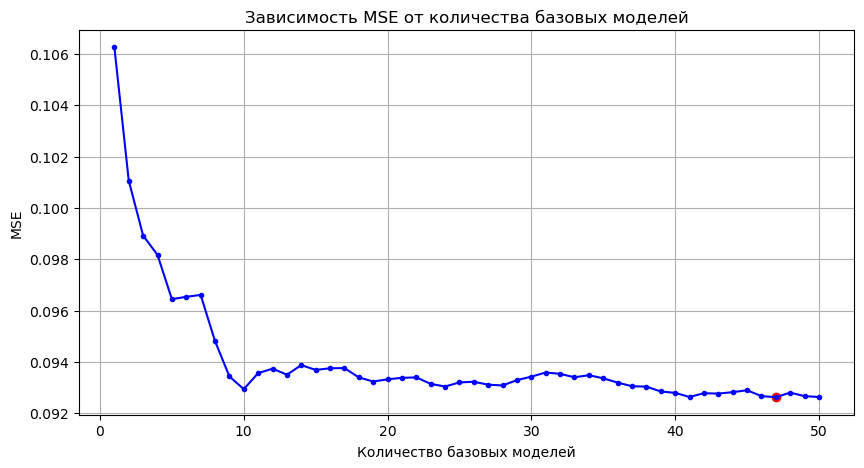

Количество деревьев решений, при котором MSE на тестовой выборке наилучший: 47


In [11]:
from sklearn.ensemble import BaggingRegressor

# генерация синусоидального сигнала
X, y = generate_sin(1000)

# преобразование y в одномерный массив
y = np.ravel(y)

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators = 50  # количество базовых моделей
mse_values = np.zeros(n_estimators)

for i in range(1, n_estimators + 1):
    # создание BaggingRegressor с решающим деревом максимальной глубины 5
    regressor = BaggingRegressor(DecisionTreeRegressor(max_depth=5),
                                 n_estimators=i,
                                 bootstrap=True,
                                 random_state=42)

    # обучение модели
    regressor.fit(X_train, y_train)

    # предсказание на тестовой выборке
    y_pred = regressor.predict(X_test)

    # расчет MSE и сохранение в список
    mse_values[i-1] = mean_squared_error(y_test, y_pred)

# нахождение количества базовых моделей с минимальным MSE
best_n_estimators = np.argmin(mse_values) + 1

# построение графика зависимости MSE от количества базовых моделей
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_estimators + 1), mse_values, marker='.', color='b')
plt.scatter(best_n_estimators, mse_values[best_n_estimators-1], color='r')
plt.title('Зависимость MSE от количества базовых моделей')
plt.xlabel('Количество базовых моделей')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

print(f'Количество деревьев решений, при котором MSE на тестовой выборке наилучший: {best_n_estimators}')

## Задание 8

Познакомься с алгоритмом случайного леса (Random Forest). Обучи алгоритм случайного леса с параметрами `max_depth=5,
n_estimators=100, max_features=1, random_state=42`.
Посчитай MSE на тестовой выборке и округли её до 3 знаков после запятой.

In [12]:
from sklearn.ensemble import RandomForestRegressor

# создание и обучение случайного леса
rf = RandomForestRegressor(max_depth=5, n_estimators=100, max_features=1, random_state=42)
rf.fit(X_train, y_train)

# прогнозирование на тестовой выборке
y_pred = rf.predict(X_test)

# вычисление MSE
mse = round(mean_squared_error(y_test, y_pred), 3)

print(f"MSE на тестовой выборке: {mse}")

MSE на тестовой выборке: 0.091
